# <span style="font-family:Papyrus; font-size:2em;">Recursion Cellular Image Classification</span>
# <span style="font-family:Papyrus; font-size:1em;">CellSignal: Disentangling biological signal from experimental noise in cellular images</span>

![](https://assets.website-files.com/5cb63fe47eb5472014c3dae6/5d040176f0a2fd66df939c51_figure1%400.75x.png)


# How to visualize images in RxRx1

The RxRx1 cellular image dataset is made up of 6-channel images, where each channel illuminates different parts of the cell (visit [RxRx.ai](https://www.rxrx.ai/) for details). This notebook demonstrates how to use the code in [rxrx1-utils](https://github.com/recursionpharma/rxrx1-utils) to load and visualize the RxRx1 images.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import sys
import matplotlib.pyplot as plt
%matplotlib inline

['train_controls.csv', 'train', 'test', 'recursion_dataset_license.pdf', 'pixel_stats.csv', 'train.csv', 'sample_submission.csv', 'test.csv', 'test_controls.csv']


In [2]:
!git clone https://github.com/recursionpharma/rxrx1-utils
print ('rxrx1-utils cloned!')

Cloning into 'rxrx1-utils'...
remote: Enumerating objects: 115, done.
remote: Total 115 (delta 0), reused 0 (delta 0), pack-reused 115
Receiving objects: 100% (115/115), 1.59 MiB | 0 bytes/s, done.
Resolving deltas: 100% (57/57), done.
rxrx1-utils cloned!


In [3]:
!ls

__notebook__.ipynb  __output__.json  rxrx1-utils


In [4]:
sys.path.append('rxrx1-utils')
import rxrx.io as rio

# Loading a site and visualizing individual channels

Use load_site to get the 512 x 512 x 6 image tensor for a site. The arguments you pass to load_site tell it which image you want. In the example below, from the train set, we request the image in experiment RPE-05 on plate 3 in well D19 at site 2.

In [5]:
t = rio.load_site('train', 'RPE-05', 3, 'D19', 2)
t.shape

(512, 512, 6)

At this point, you can visualize the individual channels.

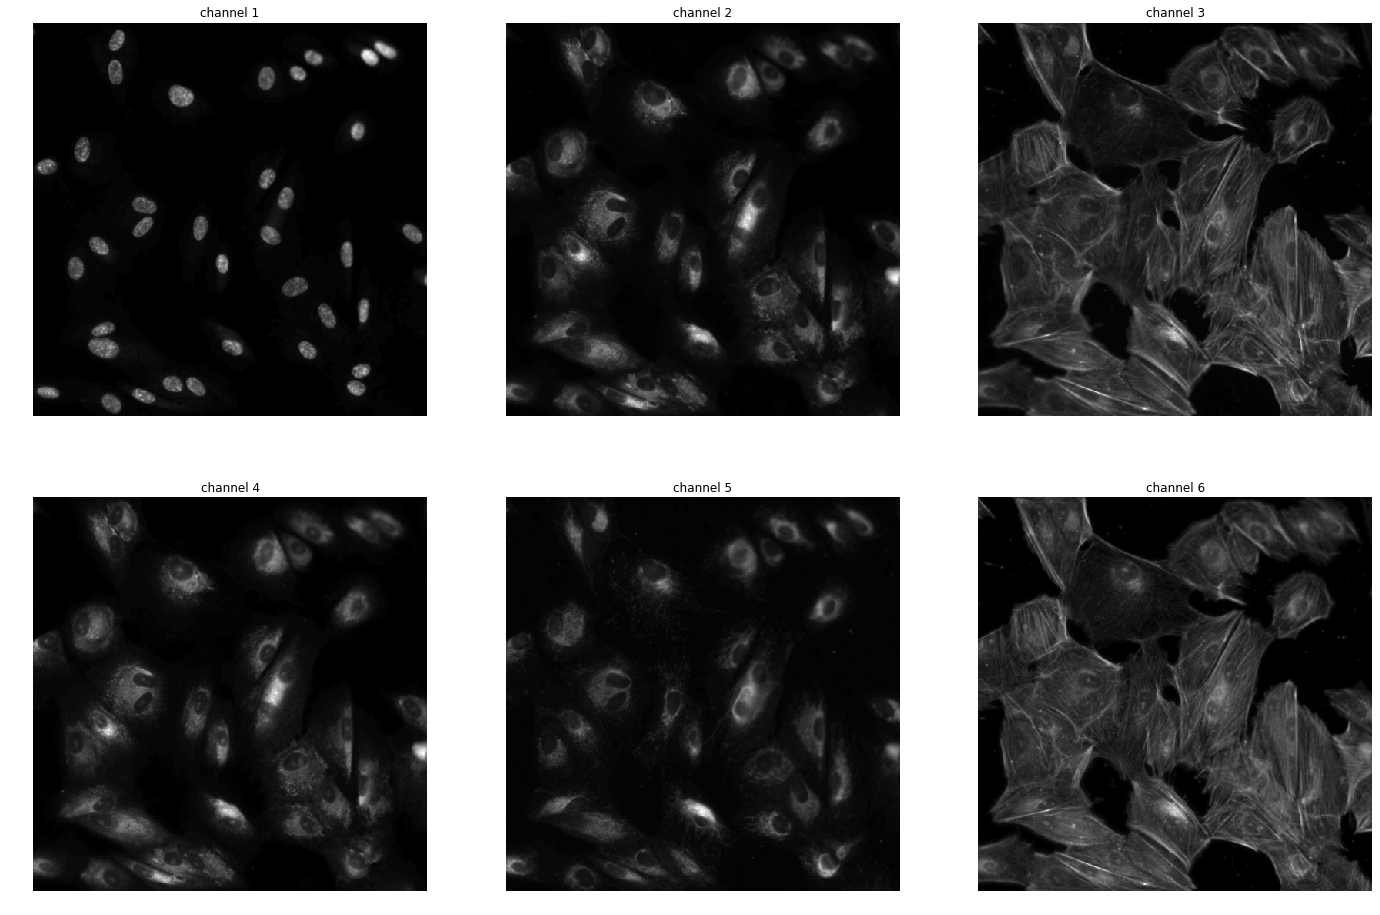

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

for i, ax in enumerate(axes.flatten()):
  ax.axis('off')
  ax.set_title('channel {}'.format(i + 1))
  _ = ax.imshow(t[:, :, i], cmap='gray')

The function load_site takes an optional base_path argument that defaults to *gs://rxrx1-us-central1/images*, one of the two Google Cloud Storage buckets containing the RxRx1 image set. You can also set base_path to the path of your local copy of the dataset, and this is how you'll typically want to work with this function.

# Converting a site to RGB format

In order to visualize all six channels at once, use **convert_tensor_to_rgb**. It associates an RGB color with each channel, then aggregates the color channels across the six cellular channels.



In [7]:
x = rio.convert_tensor_to_rgb(t)
x.shape

(512, 512, 3)

Now plot your RGB image.

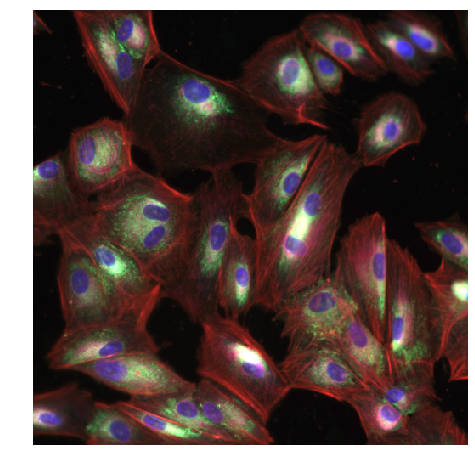

In [8]:
plt.figure(figsize=(8, 8))
plt.axis('off')

_ = plt.imshow(x)

# Load and convert to RGB
For convenience, there is a wrapper around these two functions called ```load_site_as_rgb``` with the same signature as ```load_site```.

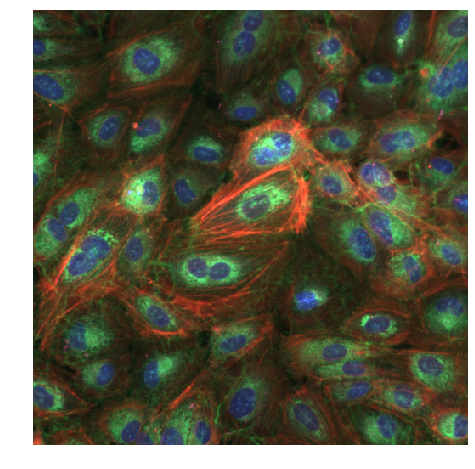

In [9]:
y = rio.load_site_as_rgb('train', 'HUVEC-08', 4, 'K09', 1)

plt.figure(figsize=(8, 8))
plt.axis('off')

_ = plt.imshow(y)